In [ ]:
# importar las librerias a utilizar para el entrenamiento, lectura y limpieza de los datos

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score

import seaborn as sns

In [ ]:
# cargamos el archivo spambase.data que contiene los registros de los correos de spam

ubicacion = "spambase.data"
df = pd.read_csv(ubicacion, header=None)

print(df)

        0     1     2    3     4     5     6     7     8     9   ...     48  \
0     0.00  0.64  0.64  0.0  0.32  0.00  0.00  0.00  0.00  0.00  ...  0.000   
1     0.21  0.28  0.50  0.0  0.14  0.28  0.21  0.07  0.00  0.94  ...  0.000   
2     0.06  0.00  0.71  0.0  1.23  0.19  0.19  0.12  0.64  0.25  ...  0.010   
3     0.00  0.00  0.00  0.0  0.63  0.00  0.31  0.63  0.31  0.63  ...  0.000   
4     0.00  0.00  0.00  0.0  0.63  0.00  0.31  0.63  0.31  0.63  ...  0.000   
...    ...   ...   ...  ...   ...   ...   ...   ...   ...   ...  ...    ...   
4596  0.31  0.00  0.62  0.0  0.00  0.31  0.00  0.00  0.00  0.00  ...  0.000   
4597  0.00  0.00  0.00  0.0  0.00  0.00  0.00  0.00  0.00  0.00  ...  0.000   
4598  0.30  0.00  0.30  0.0  0.00  0.00  0.00  0.00  0.00  0.00  ...  0.102   
4599  0.96  0.00  0.00  0.0  0.32  0.00  0.00  0.00  0.00  0.00  ...  0.000   
4600  0.00  0.00  0.65  0.0  0.00  0.00  0.00  0.00  0.00  0.00  ...  0.000   

         49   50     51     52     53     54   55  

In [ ]:
# agregamos los headers a nuestra base de datos

encabezados = ['word_freq_make', 'word_freq_address', 'word_freq_all', 'word_freq_3d', 'word_freq_our', 'word_freq_over', 'word_freq_remove', 'word_freq_internet', 'word_freq_order', 'word_freq_mail', 'word_freq_receive', 'word_freq_will', 'word_freq_people', 'word_freq_report', 'word_freq_addresses', 'word_freq_free', 'word_freq_business', 'word_freq_email', 'word_freq_you', 'word_freq_credit', 'word_freq_your', 'word_freq_font', 'word_freq_000', 'word_freq_money', 'word_freq_hp', 'word_freq_hpl', 'word_freq_george', 'word_freq_650', 'word_freq_lab', 'word_freq_labs', 'word_freq_telnet', 'word_freq_857', 'word_freq_data', 'word_freq_415', 'word_freq_85', 'word_freq_technology', 'word_freq_1999', 'word_freq_parts', 'word_freq_pm', 'word_freq_direct', 'word_freq_cs', 'word_freq_meeting', 'word_freq_original', 'word_freq_project', 'word_freq_re', 'word_freq_edu', 'word_freq_table', 'word_freq_conference', 'char_freq_;', 'char_freq_(', 'char_freq_[', 'char_freq_!', 'char_freq_$', 'char_freq_#', 'capital_run_length_average', 'capital_run_length_longest', 'capital_run_length_total', 'Class']
df.columns = encabezados
df.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,Class
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


In [ ]:
# limpiamos la base de datos de los correos de spam

# eliminamos los registros que tienen algun cammpo en Null
df.dropna(inplace=True)

In [ ]:
# Hacemos un analisis exploratorio de nuestros datos para seleccionar las variables

df.describe()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,Class
count,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,...,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000
mean,0.104553,0.213015,0.280656,0.065425,0.312223,0.095901,0.114208,0.105295,0.090067,0.239413,...,0.038575,0.139030,0.016976,0.269071,0.075811,0.044238,5.191515,52.172789,283.289285,0.394045
std,0.305358,1.290575,0.504143,1.395151,0.672513,0.273824,0.391441,0.401071,0.278616,0.644755,...,0.243471,0.270355,0.109394,0.815672,0.245882,0.429342,31.729449,194.891310,606.347851,0.488698
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.588000,6.000000,35.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.065000,0.000000,0.000000,0.000000,0.000000,2.276000,15.000000,95.000000,0.000000
75%,0.000000,0.000000,0.420000,0.000000,0.380000,0.000000,0.000000,0.000000,0.000000,0.160000,...,0.000000,0.188000,0.000000,0.315000,0.052000,0.000000,3.706000,43.000000,266.000000,1.000000
max,4.540000,14.280000,5.100000,42.810000,10.000000,5.880000,7.270000,11.110000,5.260000,18.180000,...,4.385000,9.752000,4.081000,32.478000,6.003000,19.829000,1102.500000,9989.000000,15841.000000,1.000000


In [ ]:
# separamos la variable predictora 'Class' de el resto de los datos para posteriormente visualizar graficos significativos

X,y = df[encabezados[:-1]], df['Class']
X.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.0,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.0,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.0,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.0,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.0,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191


In [ ]:
# seccionamos la base de datos para contemplar un conjunto de entrenamiento y uno de test
# X = X.to_numpy()

# X_dos_car = df[['word_freq_make', 'word_freq_all']].values
# y_codif = df['Class'].values

X_dos_car = df[['word_freq_remove', 'word_freq_our']].values
y_codif = df['Class'].values

# X_dos_car = X[:,np.array(['word_freq_make', 'word_freq_address'])]
# y_codif = df['Class']

X_train, X_test, y_train, y_test = train_test_split(X_dos_car, y_codif, test_size=0.3, random_state=27)

# comprobamos que realizo el split  de los datos

print( len(X_train) )
print( len(y_test) )

print( len(X_train) + len(y_test) )

3220
1381
4601


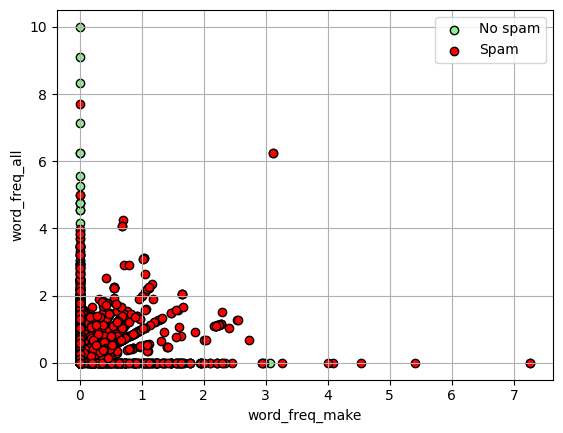

In [ ]:
# Analizamos el comportamiento de las variables con graficos

fig, ax = plt.subplots()
clase_0_noSpam = np.where(y == 0)
clase_1_spam = np.where(y == 1)

# Clase 0 no spam
ax.scatter(X_dos_car[clase_0_noSpam, 0], X_dos_car[clase_0_noSpam, 1], c="lightgreen", label='No spam', edgecolor="black")
# Clase 1 spam
ax.scatter(X_dos_car[clase_1_spam, 0], X_dos_car[clase_1_spam, 1], c="red", label='Spam', edgecolor="black")

ax.legend()
ax.grid(True)
plt.xlabel('word_freq_make')
plt.ylabel('word_freq_all')
plt.show()



Matriz de confusión:
[[770  40]
 [367 204]]

Accuracy: 0.7053


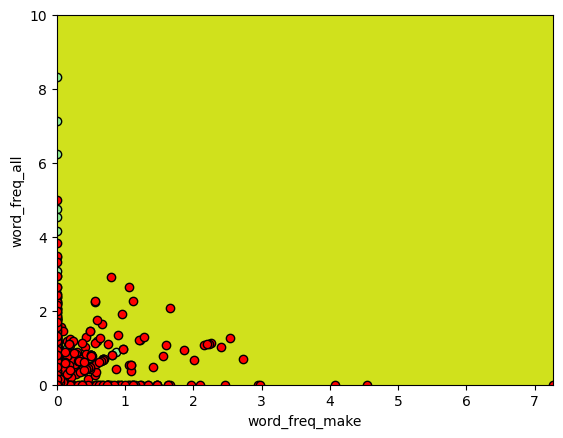

In [ ]:
# De lo anterior podemos visualizar que las características word_freq_remove combinada con word_freq_our pueden ser significativas para el entrenamiento
# Procedemos a intentar entrenar con el modelo lineal y estas dos características

from sklearn.linear_model import LogisticRegression

# Creamos el modelo de regresión logística
logreg = LogisticRegression()

# Entrenamos el modelo usando el conjunto de entrenamiento
logreg.fit(X_train, y_train)

# Realizamos predicciones usando el conjunto de prueba
y_pred = logreg.predict(X_test)

# Matriz de confusión
print('\nMatriz de confusión:')
print(confusion_matrix(y_test, y_pred))
# Precisión - accuracy
print('\nAccuracy: %.4f' % accuracy_score(y_test, y_pred))

# Graficar superficie de decisión usando DecisionBoundaryDisplay
from sklearn.inspection import DecisionBoundaryDisplay

# Crear grilla para gráfica con los datos de entrenamiento
feature_1, feature_2 = np.meshgrid(
    np.linspace(X_train[:, 0].min(), X_train[:, 0].max(), num=500),
    np.linspace(X_train[:, 1].min(), X_train[:, 1].max(), num=500)
)

grid = np.vstack([feature_1.ravel(), feature_2.ravel()]).T

# Hacer predicciones con el GRID
y_pred_grid = logreg.predict(grid)

# Hacer grid con las predicciones
y_pred_grid = np.reshape(y_pred_grid, feature_1.shape)

# Generar gráfica
display = DecisionBoundaryDisplay(xx0=feature_1, xx1=feature_2, response=y_pred_grid)
display.plot()

# Se usan datos de evaluación para el scatter
clase_0_pos = np.where(y_test == 0)
clase_1_pos = np.where(y_test == 1)

# Clase 0
display.ax_.scatter(X_test[clase_0_pos, 0], X_test[clase_0_pos, 1], c="lightgreen", label='No spam', edgecolor="black")
# Clase 1
display.ax_.scatter(X_test[clase_1_pos, 0], X_test[clase_1_pos, 1], c="red", label='Spam', edgecolor="black")

# ax.legend()
# ax.grid(True)
plt.xlabel('word_freq_make')
plt.ylabel('word_freq_all')
plt.show()

In [ ]:
X1 = df[encabezados[:]]
print(len(X1))
X1.head()

4601


,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,Class
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


In [ ]:
#transforma el dataframe a un arreglo de numpy

X1 = X1.to_numpy()

In [ ]:

y = df['Class'].values

#==============================================================================

# crea filtro para separar las clases
clase_0_noSpam = np.where(y == 0)
clase_1_spam = np.where(y == 1)


# X1[clase_1_spam, 57].mean()
# X1[clase_1_spam, 0:-1]
# print(X1[clase_1_spam, 54].mean(axis=1))

# separacion de caracteristicas por clase
A = X1[clase_1_spam, 0:-1]
B = X1[clase_0_noSpam, 0:-1]

# calculo de promedio de caracteristica por clase
prom_spam = A.mean(axis=1)
prom_noSpam = B.mean(axis=1)

# calculo varianza de caracteristica por clase
var_spam = A.var(axis=1)
var_noSpam = B.var(axis=1)

fdr = (prom_spam - prom_noSpam)**2 / (var_spam + var_noSpam)
# print("FDR = ")
# print((fdr))

# pasamos el arreglo a un df

df_fdr = pd.DataFrame(fdr)

# ahora le agregamos el nombre de la caracteristica

df_fdr.columns = encabezados[:-1]

# ahora ordenamos de mayor a menor el dataframe

df_fdr = df_fdr.sort_values(by=0, axis=1, ascending=False)

df_fdr

# print(prom_spam)
# print(prom_spam.size)

,word_freq_your,word_freq_000,word_freq_remove,char_freq_$,word_freq_hp,word_freq_you,word_freq_hpl,word_freq_free,char_freq_!,word_freq_business,...,word_freq_direct,char_freq_[,char_freq_;,word_freq_report,char_freq_#,word_freq_3d,word_freq_table,word_freq_parts,word_freq_address,word_freq_will
0,0.346893,0.210192,0.208553,0.196801,0.178683,0.174334,0.145231,0.140703,0.132835,0.130027,...,0.010288,0.01026,0.008791,0.007697,0.007534,0.00545,0.005013,0.00242,0.002285,0.000136


In [ ]:
# Crear una matriz de correlación para el conjunto de datos
correlation_matrix = df.corr(numeric_only=True)

snd1 = (correlation_matrix['Class'])*0.5 - (correlation_matrix['word_freq_your'].values)*0.5
snd2 = (correlation_matrix['Class'])*0.3 - (correlation_matrix['word_freq_your'].values)*0.7
snd3 = (correlation_matrix['Class'])*0.7 - (correlation_matrix['word_freq_your'].values)*0.3

print("SIIIIIIIIIIIIIII")
print( snd1.sort_values(ascending=False).head(4) )
print("0000000000A")
print( snd2.sort_values(ascending=False).head(4) )
print("3333333333")
print( snd3.sort_values(ascending=False).head(4) )
# print(correlation_matrix["word_freq_your"])
print("AAAAAAAA")
print(correlation_matrix['word_freq_your'].sort_values(ascending=False))

# imprime todas las correlaciones de la columna 'Class' excepto la de la misma columna
print("BBBBBBBB")
print(correlation_matrix['Class'].sort_values(ascending=False)[1:])
# print(max(correlation_matrix['Class']))
# Crear un mapa de calor para visualizar la matriz de correlación
sns.heatmap(correlation_matrix, annot=False, cmap="coolwarm", center=0)

NameError: name 'df' is not defined